In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
female  = pd.read_csv("./clean_dataset/clean_female_ankle_walk.csv", parse_dates=['time'])
male = pd.read_csv("./clean_dataset/clean_male_ankle_walk.csv", parse_dates=['time'])

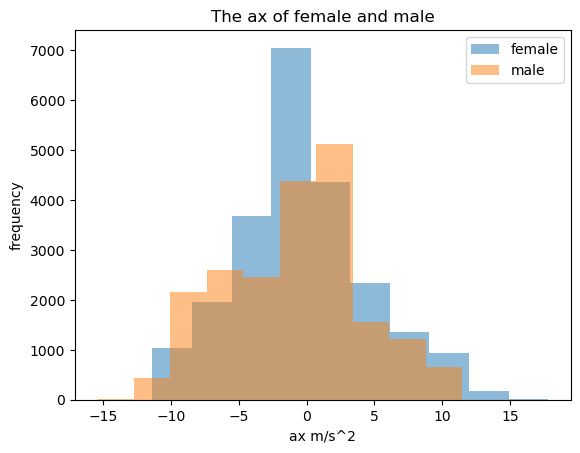

In [3]:
plt.hist(female['ax'],alpha=0.5, label='female')
plt.hist(male['ax'],alpha=0.5, label='male')
plt.title('The ax of female and male')
plt.xlabel('ax m/s^2')
plt.ylabel('frequency')
plt.legend(loc="upper right")
#plt.show()

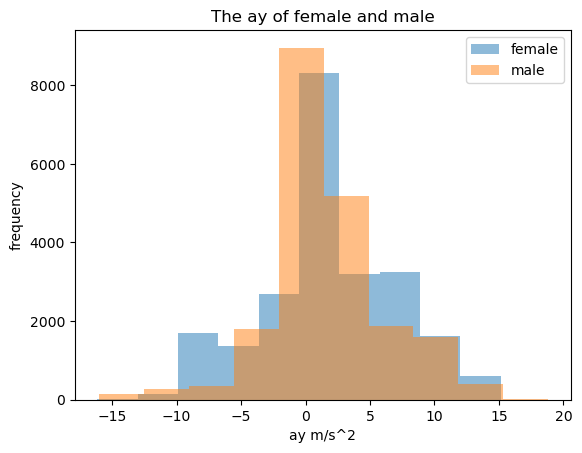

In [4]:
plt.hist(female['ay'],alpha=0.5, label='female')
plt.hist(male['ay'],alpha=0.5, label='male')
plt.title('The ay of female and male')
plt.xlabel('ay m/s^2')
plt.ylabel('frequency')
plt.legend(loc="upper right")
#plt.show()

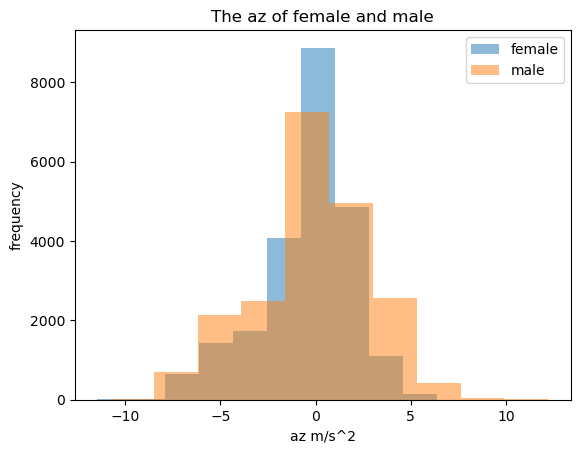

In [5]:
plt.hist(female['az'],alpha=0.5, label='female')
plt.hist(male['az'],alpha=0.5, label='male')
plt.title('The az of female and male')
plt.xlabel('az m/s^2')
plt.ylabel('frequency')
plt.legend(loc="upper right")
#plt.show()

In [6]:
female['acceleration'] = np.sqrt((female['ax'])**2 + (female['ay'])**2 + (female['az'])**2)
male['acceleration'] = np.sqrt((male['ax'])**2 + (male['ay'])**2 + (male['az'])**2)

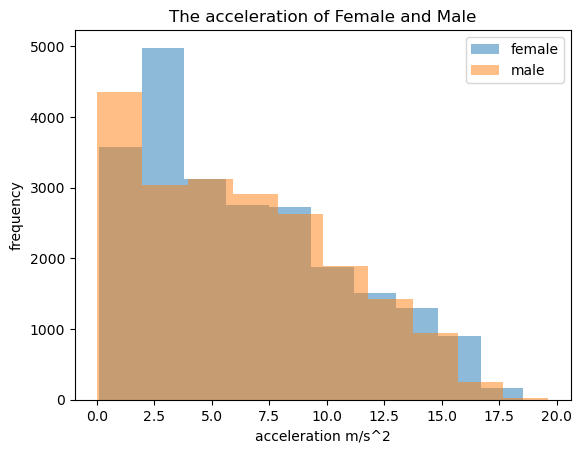

In [7]:
plt.hist(female['acceleration'],alpha=0.5, label='female')
plt.hist(male['acceleration'],alpha=0.5, label='male')
plt.title('The acceleration of Female and Male')
plt.xlabel('acceleration m/s^2')
plt.ylabel('frequency')
plt.legend(loc="upper right")
#plt.show()

In [8]:
female['ax'].describe()

count    22908.000000
mean        -0.268051
std          4.810801
min        -11.357833
25%         -3.003308
50%         -0.896744
75%          2.636390
max         17.805027
Name: ax, dtype: float64

In [9]:
female['ay'].describe()

count    22908.000000
mean         1.720178
std          5.223084
min        -16.144113
25%         -0.585278
50%          0.745502
75%          5.527075
max         15.129249
Name: ay, dtype: float64

In [10]:
female['az'].describe()

count    22908.000000
mean        -0.405410
std          2.411878
min        -11.457150
25%         -1.398886
50%         -0.031928
75%          1.133299
max          6.401385
Name: az, dtype: float64

In [11]:
female['acceleration'].describe()

count    22908.000000
mean         6.375649
std          4.334310
min          0.113593
25%          2.660976
50%          5.471568
75%          9.338393
max         18.528153
Name: acceleration, dtype: float64

In [12]:
male['ax'].describe()

count    20577.000000
mean        -0.793876
std          4.982553
min        -15.413234
25%         -4.701402
50%         -0.081815
75%          2.211368
max         11.486800
Name: ax, dtype: float64

In [13]:
male['ay'].describe()

count    20577.000000
mean         1.721215
std          4.448853
min        -16.006198
25%         -0.120503
50%          0.777156
75%          3.840642
max         18.823341
Name: ay, dtype: float64

In [14]:
male['az'].describe()

count    20577.000000
mean        -0.110064
std          3.011780
min        -10.797813
25%         -1.749989
50%          0.170023
75%          1.727710
max         12.217852
Name: az, dtype: float64

In [15]:
male['acceleration'].describe()

count    20577.000000
mean         6.257397
std          4.258771
min          0.026605
25%          2.412479
50%          5.760448
75%          9.338643
max         19.623436
Name: acceleration, dtype: float64

In [16]:
male = male[male['time'].str.len() == 24]
male = male.reset_index(drop=True)

In [17]:
new_time = pd.Series(np.zeros(male.shape[0]), index=male.index)
for i in range(male.shape[0]):
    temp = pd.to_datetime(male['time'][i], format='%Y-%m-%d %H:%M:%S.%f')
    new_time[i] = temp
male['time'] = new_time

In [18]:
time_interval = male['time'][1] - male['time'][0]
time_interval = time_interval.total_seconds()

total_time = male['time'][male.shape[0]-1] - male['time'][0]
total_time = total_time.total_seconds()

In [19]:
female['ax_time'] = female['ax'] * time_interval
female['ay_time'] = female['ay'] * time_interval
female['az_time'] = female['az'] * time_interval

s_female = np.sqrt((female['ax_time'].sum())**2 + (female['ay_time'].sum())**2 + (female['az_time'].sum())**2)
s_female

409.4846040014444

In [20]:
male['ax_time'] = male['ax'] * time_interval
male['ay_time'] = male['ay'] * time_interval
male['az_time'] = male['az'] * time_interval

s_male = np.sqrt((male['ax_time'].sum())**2 + (male['ay_time'].sum())**2 + (male['az_time'].sum())**2)
s_male

390.66595196315086